In [1]:
import gym
import gym_simple
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Available environments in gym-simple
# Random: initial state is randomly initialized each episode
# Fixed: initial state is randomly initialized first episode and then fixed the rest of the episodes
# Different size 2D grids: 3x3, 5x5, 8x8, 20x20
env = gym.make('PutBallInBoxEnvRandom5x5-v0')

print(env.action_space)
print(env.observation_space)

# Possible actions for the agent
actions = ['up', 'down', 'left', 'right', 'up-right', 'up-left',
    'down-right', 'down-left', 'pick-up', 'put-down']

Discrete(10)
Box(5, 5, 5, 5, 5, 5, 3)


In [3]:
# Simulate with random actions only
# This will be the random baseline, since by chance the agent reaches the goal but 
# isn't learning how to perform the task of putting the ball in the box
n_episodes = 2000
n_steps = 1000

cum_avg_reward_lst = []
total_reward = 0
for i_episode in range(n_episodes):
    observation,_,_,_ = env.reset()
    for t in range(n_steps):
        # Uncomment if you want to see the agent's action
        #env.render()
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
        total_reward += reward
        if done:
            break
    cum_avg_reward = total_reward/(i_episode + 1)
    cum_avg_reward_lst.append(cum_avg_reward)

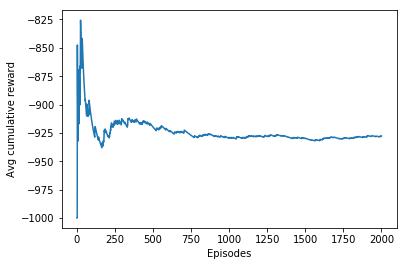

In [4]:
plt.plot(cum_avg_reward_lst)
plt.ylabel('Avg cumulative reward')
plt.xlabel('Episodes')
plt.show()

In [5]:
import gym
import gym_simple
import numpy as np
import time

import matplotlib.pyplot as plt

env = gym.make('PutBallInBoxEnvRandom5x5-v0')
# Q-Table
# Usually this table is initialized with all zeros but then using np.argmax, when all values
# are the same in a row, it returns the 0-index so the first action is selected in the list of actions, 
# so the algorithm starts by giving priority to the move-up action
"""
Q = np.zeros(
    shape=[5,5,5,5,5,5,3, env.action_space.n]
)
"""
Q = np.random.uniform(
    low=-10.0,
    high=10.0,
    size=[5,5,5,5,5,5,3, env.action_space.n]
)

print(Q.shape)
# Learning rate
lr = 0.8
# Discount factor
y = 0.95
# e-greedy factor
e = 0.5
n_episodes = 2000
n_steps = 1000

cum_avg_reward_lst = []
total_reward = 0
for i_episode in range(n_episodes):
    s,_,_,_ = env.reset()
    s = tuple(s)
    for t in range(n_steps):
        #env.render()
        # e-greedy exploration
        if np.random.rand(1) < e:
            a = env.action_space.sample()
        else:
            a = np.argmax(Q[s])
        s1, r, done, _ = env.step(a)
        s1 = tuple(s1)
        Q[s][a] = Q[s][a] + lr*(r + y*np.max(Q[s1]) - Q[s][a])
        total_reward += r
        s = s1
        if done:
            break
    cum_avg_reward = total_reward/(i_episode + 1)
    cum_avg_reward_lst.append(cum_avg_reward)

(5, 5, 5, 5, 5, 5, 3, 10)


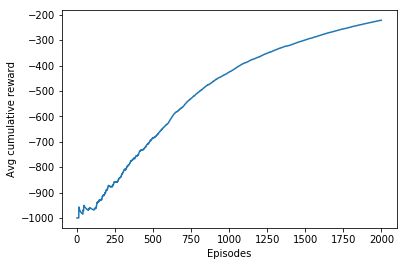

In [6]:
plt.plot(cum_avg_reward_lst)
plt.ylabel('Avg cumulative reward')
plt.xlabel('Episodes')
plt.show()

In [7]:
# Test Q-table learning
total_reward = 0
n_episodes = 10
n_steps = 20

for i_episode in range(n_episodes):
    print('Episode: ' + str(i_episode+1))
    s,_,_,_ = env.reset()
    s = tuple(s)
    for t in range(n_steps):
        env.render()
        a = np.argmax(Q[s])
        s1, r, done, _ = env.step(a)
        s = tuple(s1)
        total_reward += r
        if done:
            print("Reached the goal after {} timesteps".format(t+1))
            break
        time.sleep(1)
    if not done:
        print("Didnt reach the goal after {} timesteps".format(n_steps))
    print(total_reward/(i_episode + 1))
env.close()

Episode: 1
Didnt reach the goal after 20 timesteps
-20.0
Episode: 2
Didnt reach the goal after 20 timesteps
-20.0
Episode: 3
Didnt reach the goal after 20 timesteps
-20.0
Episode: 4
Didnt reach the goal after 20 timesteps
-20.0
Episode: 5
Didnt reach the goal after 20 timesteps
-20.0
Episode: 6
Reached the goal after 8 timesteps
-1.1666666666666667
Episode: 7
Reached the goal after 6 timesteps
12.571428571428571
Episode: 8
Reached the goal after 7 timesteps
22.75
Episode: 9
Didnt reach the goal after 20 timesteps
18.0
Episode: 10
Didnt reach the goal after 20 timesteps
14.2
